## mongoengine

Document: https://docs.mongoengine.org/tutorial.html

In [28]:
from mongoengine import *
from IPython.display import Image
import datetime
from datetime import datetime as dt
import numpy as np
import matplotlib.pyplot as plt

In [8]:
user = 'Rui'
pw = 'Yza6UM2U62P7b66q'
url = 'greencloud.e1prl9a.mongodb.net/test'
DB_URI = "mongodb+srv://{}:{}@{}".format(user, pw, url)
connect(db="test",host=DB_URI)

MongoClient(host=['ac-cxqvpp1-shard-00-01.e1prl9a.mongodb.net:27017', 'ac-cxqvpp1-shard-00-02.e1prl9a.mongodb.net:27017', 'ac-cxqvpp1-shard-00-00.e1prl9a.mongodb.net:27017'], document_class=dict, tz_aware=False, connect=True, authsource='admin', replicaset='atlas-d1h2i2-shard-0', ssl=True, read_preference=Primary(), uuidrepresentation=3)

## Image

In [11]:
class Cam(Document):
    meta = {'collection': 'test'}
    date_time = DateTimeField(default=dt.utcnow)
    cam_id = StringField(required=True)
    img_type = StringField(required=True)
    image = FileField()

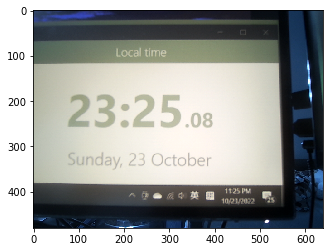

In [33]:
result = Cam.objects(img_type = 'clock_test').first()
img = result.image.read()
img = np.frombuffer(img, dtype=np.uint8)
img = np.reshape(img, [480,640,3])
plt.imshow(img, interpolation='nearest')
plt.show()

### Image 2

In [35]:
class Cam(Document):
    meta = {'collection': 'cam1'}
    # img_id = StringField(required=True)
    date_time = DateTimeField(default=datetime.datetime.utcnow)
    cam_id = StringField(required=True)
    img_type = StringField(required=True)
    width = IntField()
    height = IntField()
    center = ListField(IntField())
    image = FileField()

495 441


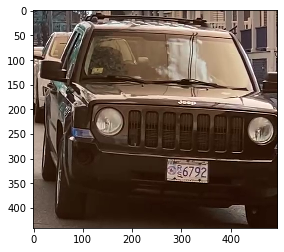

In [36]:
result = Cam.objects(img_type = 'car').first()
img = result.image.read()
img = np.frombuffer(img, dtype=np.uint8)
width = result.width
height = result.height
print(width, height)
img = np.reshape(img, [height,width,3])
plt.imshow(img, interpolation='nearest')
plt.show()